In [104]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_pd = pd.read_csv(mouse_drug_data_to_load)
#print(mouse_drug_data_pd)

clinical_trial_data_pd = pd.read_csv(clinical_trial_data_to_load)
#print(clinical_trial_data_pd)

host_drug_trial_data_pd = pd.merge(mouse_drug_data_pd, clinical_trial_data_pd, on="Mouse ID")

# Break the data into Drug datasets
drug_list = list(set(mouse_drug_data_pd['Drug']))
drug_count = len(drug_list)
#print(drug_list)
drug_trial_data_df = pd.DataFrame(host_drug_trial_data_pd)
drug_trial_data = drug_trial_data_df["Mouse ID"].value_counts()

mouse_drug_data_df = pd.DataFrame(mouse_drug_data_pd)

clinical_trial_data_df = pd.DataFrame(clinical_trial_data_pd)
trial_data = clinical_trial_data_df["Mouse ID"].value_counts()
trial_duration = clinical_trial_data_df["Timepoint"].max()
unique_trial_intervals_df = clinical_trial_data_df.drop_duplicates(["Timepoint"])
trial_intervals = unique_trial_intervals_df["Timepoint"].count()
results_header_num = (trial_intervals - 1) * 2 # Show first two sets of results
test_interval = int(trial_duration / (trial_intervals - 1))

initial_volume = int(clinical_trial_data_df["Tumor Volume (mm3)"].mode())
initial_volume = "{0:0,.2f}".format(initial_volume)
minimum_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].min()
minimum_final_volume = "{0:0,.2f}".format(minimum_final_volume)
mean_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].mean()
mean_final_volume = "{0:0,.2f}".format(mean_final_volume)
maximum_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].max()
maximum_final_volume = "{0:0,.2f}".format(maximum_final_volume)

# Display trial overview
print("Pymaceuticals Inc - Squamous Cell Carcinoma (SCC) Study Drug Trials")
print("___________________________________________________________________\n")
print(f"Drug Name Hosts Tested")
print("_________ ____________")
print(mouse_drug_data_df['Drug'].value_counts())

mouse_list = list(set(mouse_drug_data_pd['Mouse ID']))
mouse_count = len(mouse_list) + 1
print("______________________")
print(f"Trial Drug Count: {drug_count}")
print(f"Total Hosts Tested: {mouse_count}\n")

print("Trial Start Conditions")
print("______________________")
print(f"Initial Tumor Volume (mm3) @ Time Point Zero: {initial_volume}")
print(f"Time Point Test Interval (days): {test_interval}\n")

print("Trial End Conditions")
print("____________________")
print(f"Time Point Tests Per Drug Trial (Max Intervals): {trial_intervals}")
print(f"Trial Duration (Max Days): {trial_duration}")
print(f"Minimum Final Tumor Volume (mm3): {minimum_final_volume}")
print(f"Mean Final Tumor Volume (mm3): {mean_final_volume}")
print(f"Maximum Final Tumor Volume (mm3): {maximum_final_volume}\n")
print(host_drug_trial_data_pd.describe())
print("")
print(mouse_drug_data_df.describe())
print("")
print(f"Hosts Exceeding Maximum Number of {trial_intervals} Interval Tests:")
print(f"HostID #Tests")
print("______ ______")
print(trial_data.head(1))
#print(reject_mouse_list.head())
results_total_num = len(drug_trial_data_df)
drug_trial_data_df = drug_trial_data_df.drop(drug_trial_data_df[drug_trial_data_df['Mouse ID'] == "g989"].index)
rejected_rows = int((results_total_num - len(drug_trial_data_df)) / 2)
updated_results_total_num = len(drug_trial_data_df)
print(f"Rejected {rejected_rows} Test Rows of {updated_results_total_num + rejected_rows} Total Test Rows\n")
print("Drug Trial Results")
print("__________________")
print(f"First {results_header_num} Test Rows of {updated_results_total_num} Total Test Rows\n")
drug_trial_data_df.head(results_header_num)

Pymaceuticals Inc - Squamous Cell Carcinoma (SCC) Study Drug Trials
___________________________________________________________________

Drug Name Hosts Tested
_________ ____________
Ketapril     25
Ramicane     25
Naftisol     25
Ceftamin     25
Zoniferol    25
Capomulin    25
Propriva     25
Stelasyn     25
Placebo      25
Infubinol    25
Name: Drug, dtype: int64
______________________
Trial Drug Count: 10
Total Hosts Tested: 250

Trial Start Conditions
______________________
Initial Tumor Volume (mm3) @ Time Point Zero: 45.00
Time Point Test Interval (days): 5

Trial End Conditions
____________________
Time Point Tests Per Drug Trial (Max Intervals): 10
Trial Duration (Max Days): 45
Minimum Final Tumor Volume (mm3): 22.05
Mean Final Tumor Volume (mm3): 50.46
Maximum Final Tumor Volume (mm3): 78.57

         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1906.000000         1906.000000       1906.000000
mean     19.538300           50.468120          1.018363
std      14.0647

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

        Name  Tests                                           Means  \
0    Placebo    181  Tumor Volume (mm3)    54.033581
dtype: float64   
1  Capomulin    230  Tumor Volume (mm3)    40.675741
dtype: float64   
2   Ramicane    228  Tumor Volume (mm3)    40.216745
dtype: float64   
3   Ketapril    188  Tumor Volume (mm3)    55.235638
dtype: float64   
4   Naftisol    186  Tumor Volume (mm3)    54.331565
dtype: float64   
5  Zoniferol    182  Tumor Volume (mm3)    53.236507
dtype: float64   
6   Stelasyn    181  Tumor Volume (mm3)    54.233149
dtype: float64   
7   Ceftamin    178  Tumor Volume (mm3)    52.591172
dtype: float64   
8  Infubinol    178  Tumor Volume (mm3)    52.957935
dtype: float64   
9   Propriva    148   Tumor Volume (mm3)    52.32093
dtype: float64   

                     Sem  
0   [0.5813305510484215]  
1  [0.32934562342391865]  
2  [0.32095460652901503]  
3   [0.6038598237767487]  
4   [0.5964657512206463]  
5   [0.5163978968175721]  
6   [0.5731109332734033]  
7 

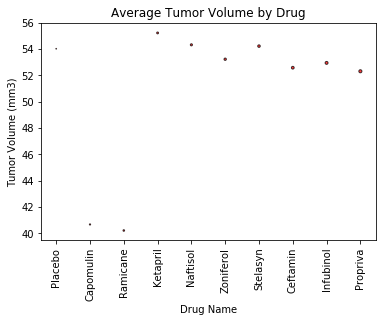

In [229]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 


#Placebo_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Timepoint", "Tumor Volume (mm3)"]]
#Placebo_0 = Placebo_all.loc[Placebo_all["Timepoint"] == 0, ["Tumor Volume (mm3)"]]


Placebo = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Tumor Volume (mm3)"]]
Placebo_mean = np.mean(Placebo)
Placebo_sem = sem(Placebo)
Placebo_num = len(Placebo)

Capomulin = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Capomulin", ["Tumor Volume (mm3)"]]
Capomulin_mean = np.mean(Capomulin)
Capomulin_sem = sem(Capomulin)
Capomulin_num = len(Capomulin)

Ramicane = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ramicane", ["Tumor Volume (mm3)"]]
Ramicane_mean = np.mean(Ramicane)
Ramicane_sem = sem(Ramicane)
Ramicane_num = len(Ramicane)

Ketapril = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ketapril", ["Tumor Volume (mm3)"]]
Ketapril_mean = np.mean(Ketapril)
Ketapril_sem = sem(Ketapril)
Ketapril_num = len(Ketapril)

Naftisol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Naftisol", ["Tumor Volume (mm3)"]]
Naftisol_mean = np.mean(Naftisol)
Naftisol_sem = sem(Naftisol)
Naftisol_num = len(Naftisol)

Zoniferol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Zoniferol", ["Tumor Volume (mm3)"]]
Zoniferol_mean = np.mean(Zoniferol)
Zoniferol_sem = sem(Zoniferol)
Zoniferol_num = len(Zoniferol)

Stelasyn = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Stelasyn", ["Tumor Volume (mm3)"]]
Stelasyn_mean = np.mean(Stelasyn)
Stelasyn_sem = sem(Stelasyn)
Stelasyn_num = len(Stelasyn)

Ceftamin = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ceftamin", ["Tumor Volume (mm3)"]]
Ceftamin_mean = np.mean(Ceftamin)
Ceftamin_sem = sem(Ceftamin)
Ceftamin_num = len(Ceftamin)

Infubinol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Infubinol", ["Tumor Volume (mm3)"]]
Infubinol_mean = np.mean(Infubinol)
Infubinol_sem = sem(Infubinol)
Infubinol_num = len(Infubinol)

Propriva = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Propriva", ["Tumor Volume (mm3)"]]
Propriva_mean = np.mean(Propriva)
Propriva_sem = sem(Propriva)
Propriva_num = len(Propriva)

Drug_Names = ['Placebo', 'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']   
Drug_Tests = [Placebo_num, Capomulin_num, Ramicane_num, Ketapril_num, Naftisol_num, Zoniferol_num, Stelasyn_num, Ceftamin_num, Infubinol_num, Propriva_num]
Drug_Means = [Placebo_mean, Capomulin_mean, Ramicane_mean, Ketapril_mean, Naftisol_mean, Zoniferol_mean, Stelasyn_mean, Ceftamin_mean, Infubinol_mean, Propriva_mean]
Drug_Sems = [Placebo_sem, Capomulin_sem, Ramicane_sem, Ketapril_sem, Naftisol_sem, Zoniferol_sem, Stelasyn_sem, Ceftamin_sem, Infubinol_sem, Propriva_sem]
drug_stats = {'Name': ['Placebo', 'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'], 'Tests': [Placebo_num, Capomulin_num, Ramicane_num, Ketapril_num, Naftisol_num, Zoniferol_num, Stelasyn_num, Ceftamin_num, Infubinol_num, Propriva_num], 'Means': [Placebo_mean, Capomulin_mean, Ramicane_mean, Ketapril_mean, Naftisol_mean, Zoniferol_mean, Stelasyn_mean, Ceftamin_mean, Infubinol_mean, Propriva_mean], 'Sem': [Placebo_sem, Capomulin_sem, Ramicane_sem, Ketapril_sem, Naftisol_sem, Zoniferol_sem, Stelasyn_sem, Ceftamin_sem, Infubinol_sem, Propriva_sem]}
# Convert to DataFrame
Drug_Stats_df = pd.DataFrame(drug_stats)
#Drug_Stats_df = Drug_Stats_df.sort_values(['Tests'], ascending=False)
#Drug_Stats_df.reset_index(inplace=True)
# Preview DataFrame
print(Drug_Stats_df)
plt.title("Average Tumor Volume by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Tumor Volume (mm3)")
data = [value for value in Drug_Means]
x_axis = np.arange(0.5, len(Drug_Means) + 0.5, 1)
tick_locations = [ticker for ticker in x_axis]
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
#plt.ylim(minimum_final_volume, maximum_final_volume)
plt.xticks(tick_locations, Drug_Stats_df["Name"], rotation="vertical")
plt.show()

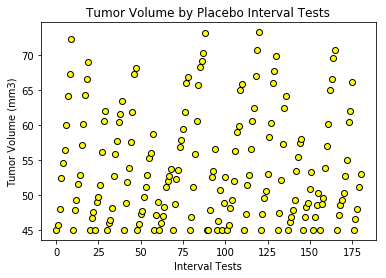

In [230]:

plt.title("Tumor Volume by Placebo Interval Tests")
x1_timepoints = np.arange(0, Placebo_num)
plt.scatter(x1_timepoints, Placebo, marker="o", facecolors="yellow", edgecolors="black", label="Placebo")
#plt.hist2d(Placebo_all,Placebo_all,bins=181)
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

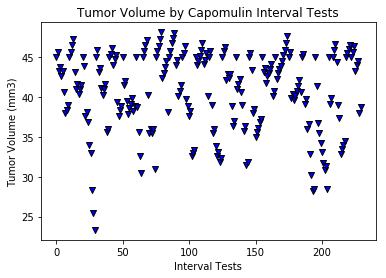

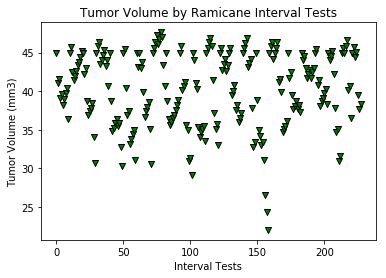

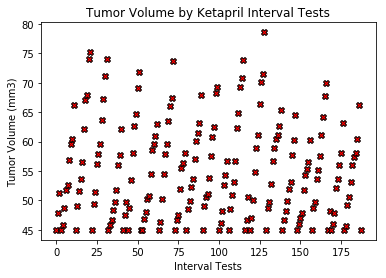

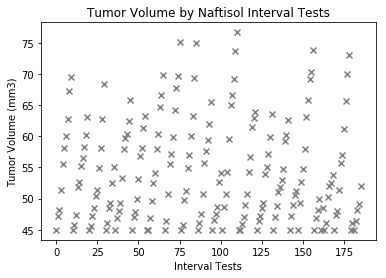

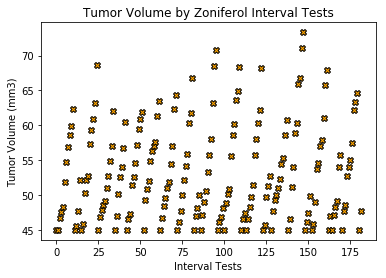

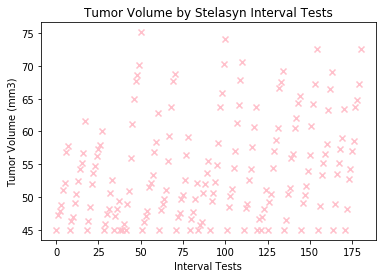

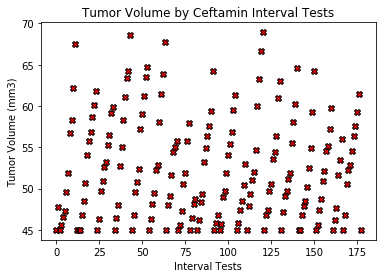

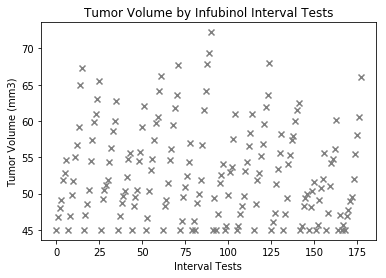

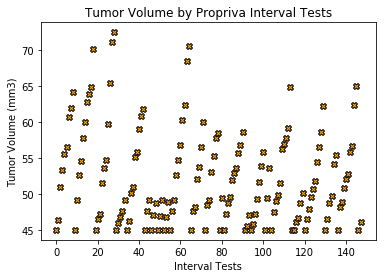

In [233]:


plt.title("Tumor Volume by Capomulin Interval Tests")
x2_timepoints = np.arange(0, Capomulin_num)
plt.scatter(x2_timepoints, Capomulin, marker="v", facecolors="blue", edgecolors="black", label="Capomulin")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ramicane Interval Tests")
x2_timepoints = np.arange(0, Ramicane_num)
plt.scatter(x2_timepoints, Ramicane, marker="v", facecolors="green", edgecolors="black", label="Ramicane")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ketapril Interval Tests")
x2_timepoints = np.arange(0, Ketapril_num)
plt.scatter(x2_timepoints, Ketapril, marker="X", facecolors="red", edgecolors="black", label="Ketapril")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Naftisol Interval Tests")
x1_timepoints = np.arange(0, Naftisol_num)
plt.scatter(x1_timepoints, Naftisol, marker="x", facecolors="grey", edgecolors="black", label="Naftisol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Zoniferol Interval Tests")
x2_timepoints = np.arange(0, Zoniferol_num)
plt.scatter(x2_timepoints, Zoniferol, marker="X", facecolors="orange", edgecolors="black", label="Zoniferol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Stelasyn Interval Tests")
x1_timepoints = np.arange(0, Stelasyn_num)
plt.scatter(x1_timepoints, Stelasyn, marker="x", facecolors="pink", edgecolors="black", label="Stelasyn")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ceftamin Interval Tests")
x2_timepoints = np.arange(0, Ceftamin_num)
plt.scatter(x2_timepoints, Ceftamin, marker="X", facecolors="red", edgecolors="black", label="Ceftamin")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Infubinol Interval Tests")
x1_timepoints = np.arange(0, Infubinol_num)
plt.scatter(x1_timepoints, Infubinol, marker="x", facecolors="grey", edgecolors="black", label="Infubinol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Propriva Interval Tests")
x2_timepoints = np.arange(0, Propriva_num)
plt.scatter(x2_timepoints, Propriva, marker="X", facecolors="orange", edgecolors="black", label="Propriva")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()